In [1]:
import os.path
import json
import time
import matplotlib.pyplot as plt
from squirrel_search import squirrel_search, fitness
from polynomial_calculator import polynomial_calc

In [2]:
dir_path = "./data/"

In [3]:
def poly_approx(data_file):
    with open(dir_path+data_file, 'r+') as f:
        data = json.load(f)
            
    start = time.time()
    result, evolution = squirrel_search(fitness, data, num_of_agents=20, num_of_iters=100, num_of_dims=len(data['coefs']), FS_l=-1, FS_u=1)
    finish = time.time()-start
    
    print("FILE: ", data_file)
    print("Duration: ", int(finish//60), "m ", finish-(finish//60)*60, "s")
    print("Final fitness: ", result.fit)
    print("Approximated coefficients: ", result.pos)
    
    plt.plot(evolution)
    plt.xlabel('iteration')
    plt.ylabel('fitness value')
    plt.title("Evolution of best agent's fitness value")
    plt.show()
    
    # calculate y values with new approximated coefficients
    approximated_y = []
    for x in data['x']:
        approximated_y.append(polynomial_calc(result.pos, x))
        
    plt.plot(data["x"], data["y"], label = "original", linewidth=7, alpha=0.5, color="cyan")
    plt.plot(data["x"], approximated_y, label = "approximated", color="red")
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.legend()
    plt.title("Original and approximated functions")
    plt.show()
    
    plot_data = (data["coefs"], result.pos)
    colors = ("cyan", "red")
    groups = ("original", "approximated")
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    for plot_data, color, group in zip(plot_data, colors, groups):
        x = range(len(plot_data))
        y = plot_data
        ax.scatter(x, y, alpha=0.5, c=color, label=group)

    plt.xlabel('degree of coeficient')
    plt.ylabel('coef. value')
    plt.title('Original and approximated coefficients')
    plt.legend()
    plt.show()
    print()

FILE:  data1.json
Duration:  0 m  2.3747828006744385 s
Final fitness:  1.488309867662041e+17
Approximated coefficients:  [0.7887523041345508, -0.493439582932996, 0.3810490280106333, -0.30301124924662, -0.9378095990425276, -0.5599282983777061, -0.7898747220111678, -0.013150646141434597, -0.32519092261319665, 0.3939679169046017]


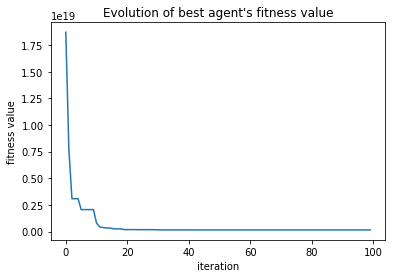

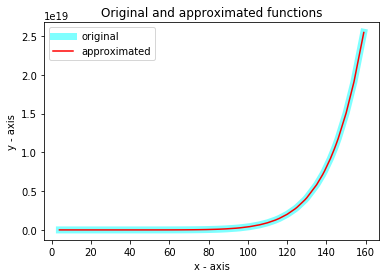

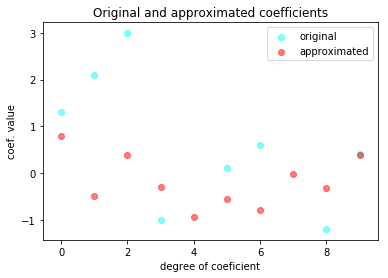


FILE:  data2.json
Duration:  0 m  2.256343364715576 s
Final fitness:  5.014291073581653e+16
Approximated coefficients:  [0.09389173941358844, -0.5508312449523136, 0.18699721587151985, 0.220161813173672, -0.251008792380083, -0.5044710761378924, 0.253346287924512, -0.19661433818835175, 0.2974047752736985, -0.002041662205722787]


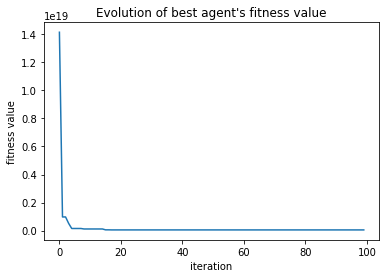

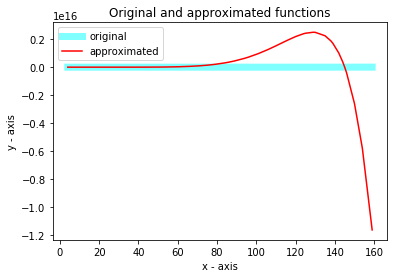

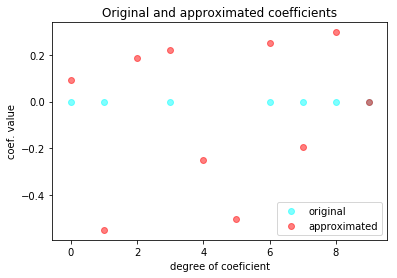


FILE:  data3.json
Duration:  1 m  11.43024754524231 s
Final fitness:  5.1607030912664575e+72
Approximated coefficients:  [-0.020204550445007803, 0.2507556830462183, -0.59735186228808, 0.14342016016302836, 0.4219888853613291, -0.6871618426257216, 0.38586432467797105, -0.48226850911002633, 0.1788157816596194, 0.38820009672299405, -0.7890763754692295, -0.16690233839623023, 0.37721479469169006, -0.4841945953768577, -0.10989371188005302, -0.5107475341330846, 0.24271354627771086, -0.711527213336565, 0.5522189457734844, -0.3933892726625912, -0.7438084619960378, 0.4576748661712169, 0.14703840811008648, -0.5956282646540602, 0.5456832832505542]


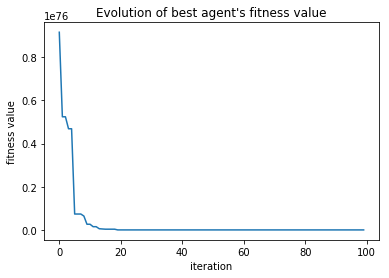

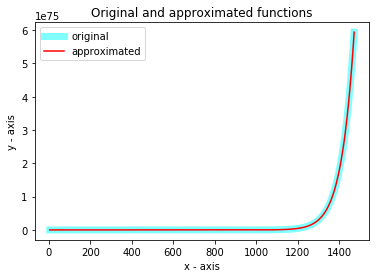

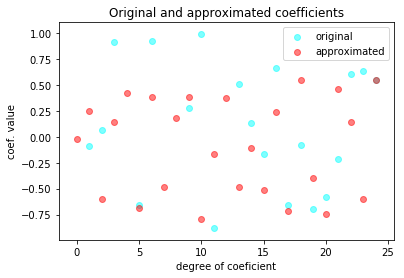


FILE:  data4.json
Duration:  0 m  1.1643352508544922 s
Final fitness:  12681.730000000145
Approximated coefficients:  [-0.17045424354892594, 0.08255308608309384, 0.21884263747063254, 0.39519781715872904, -0.48956627716421075, -0.5731102745645805, 0.5243206103914975, 0.7076433233270193]


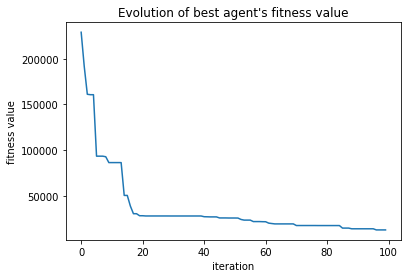

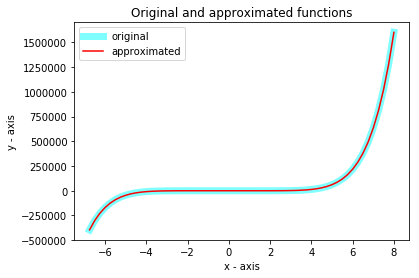

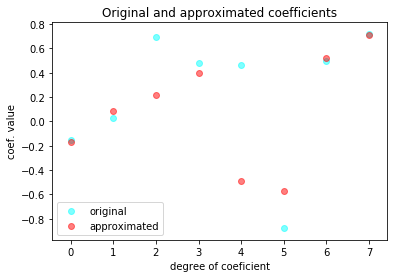


FILE:  data5.json
Duration:  0 m  1.1784002780914307 s
Final fitness:  459.9699999999998
Approximated coefficients:  [0.3129031081386339, -0.31610270324677997, -0.5608563085600781, 0.1672172073930341, 0.0817955835357245, 0.22532196597735787, -0.5678210302950856, -0.2781160163086326]


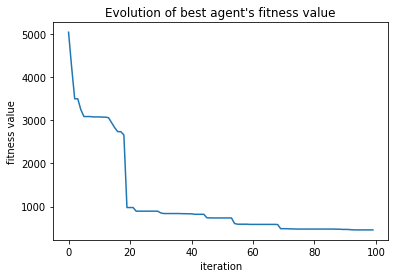

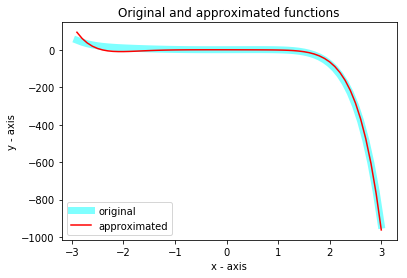

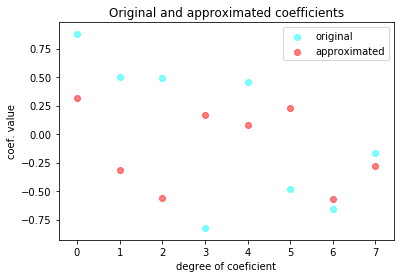


FILE:  data6.json
Duration:  0 m  0.9464175701141357 s
Final fitness:  0.37000000000000005
Approximated coefficients:  [-0.012642352508491383, -0.019609656166743695, -0.4390233465290904, 0.11314677856344911, 0.1271391615759019, -0.3425576141984983, -0.001951054265721442, 0.12301135782493836]


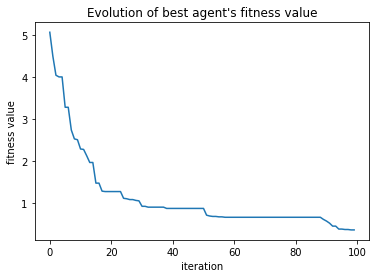

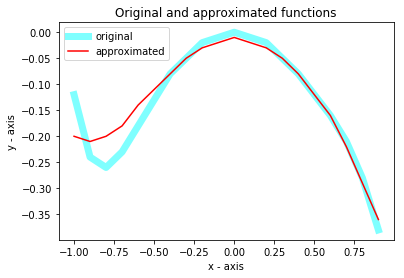

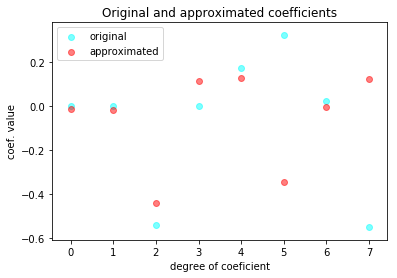


FILE:  data7.json
Duration:  0 m  1.7969872951507568 s
Final fitness:  21599123.01
Approximated coefficients:  [-0.017791429574501725, 0.15678845013966514, -0.371460255938101, 0.5353304888770908, -0.15978455194515553, -0.5940908674789069, -0.3422433607064259, -0.327395440422319, -0.06118697605448078, -0.36883635521695823, -0.41558671692060134, 0.06430592160013121, 0.17116274277944568, -0.160313038996573, 0.21749672137017156, 0.516399649615624, 0.031967937941864165, -0.29875760016078745, -0.11605072588065997, -0.015543116645554727]


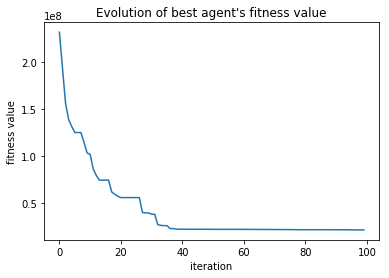

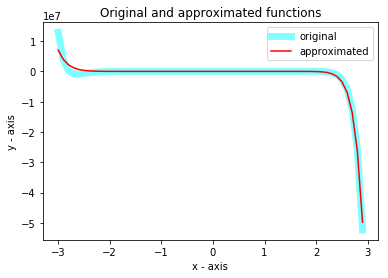

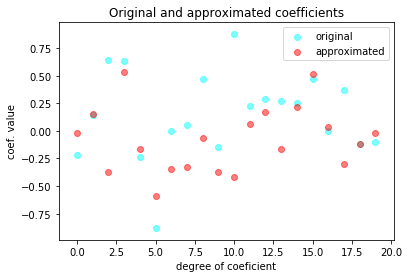

In [4]:
for filename in os.listdir(dir_path):
    poly_approx(filename)